In [1]:
#explore data visualization, Train and create linear regression model 
#calculate root mean square
#build another regression model and compare the two

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
#load the data set using pandas - price in seateall area
house = pd.read_csv("Youtube_Notes_ML/1_home_data.csv")

In [4]:
#to see the data set looks like
house.head()
#we will try to predict the price of the houses for future
#also we will we will use features of house and predict the price of the house.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#to check the number of houses
house.tail() #gives the last 5 data rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
#information of house data set
house.info()
#house.sqft_living15               #show the column of "sqft_living15"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.4+ MB


In [7]:
#to have a statistical describtion of the dataset
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#to check the columns of the data set - requires no attributes
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

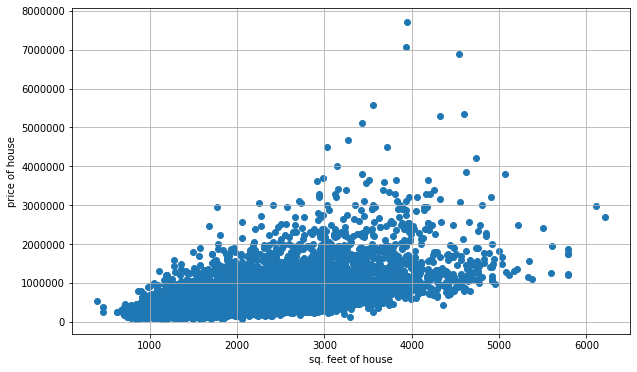

In [9]:
#visualize the data set #plot the scatsqft_living15terplot
#use sqft_living15 vs price

plt.figure(figsize = (10,6)) #to increase the figure size
plt.scatter(house.sqft_living15, house.price)
plt.xlabel('sq. feet of house')
plt.ylabel('price of house')
plt.grid(axis = 'both')

/home/shrihari/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


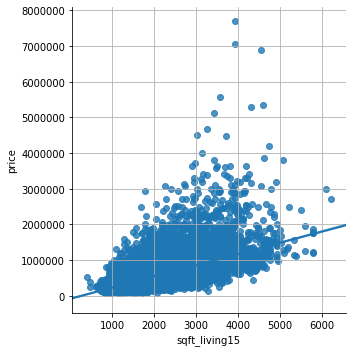

In [10]:
#try to get the linear regression
sns.lmplot('sqft_living15', 'price', data = house)
plt.grid(axis = 'both')

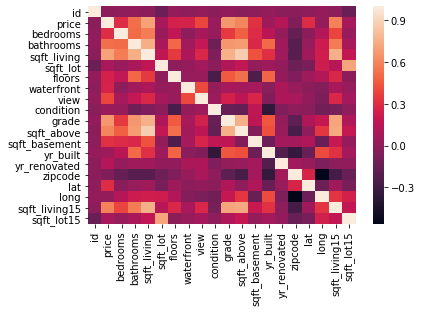

In [11]:
#to see a heatmap - the correlation of the heat map
sns.heatmap(house.corr())

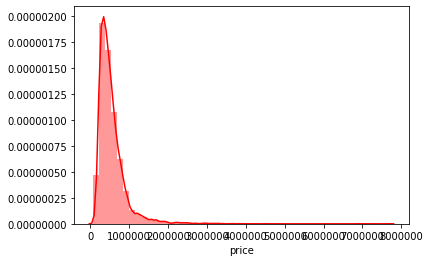

In [12]:
#distplot - 
sns.distplot(house['price'], color = 'red')

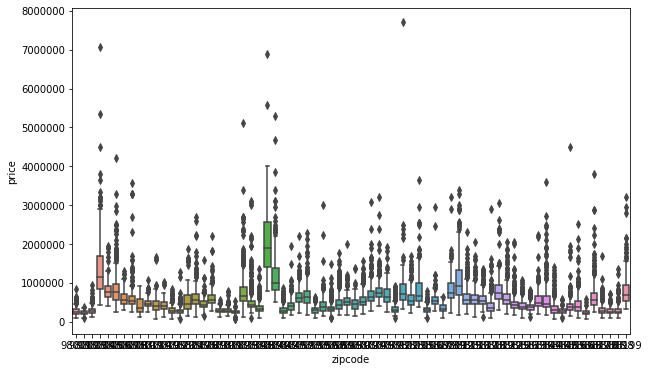

In [13]:
#boxplot
plt.figure(figsize = (10,6))
sns.boxplot(x = 'zipcode', y='price', data=house)
#higher the level, that is, that particular zip code has the maximum price

# 1. Linear Regression Model

In [14]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [15]:
# 'X' represents 2D array and 'y' represents the 1D array
#we will train the data set using the X values
X = house[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors','sqft_above','sqft_living15', 'yr_built',
           'condition', 'zipcode']]

y = house['price']

In [16]:
X.shape

(21613, 10)

In [17]:
from sklearn.model_selection import train_test_split
# we will split the data into training and testing and we will train our model on those training datasets and using
# the test datasets, we will test our data on the created model


In [18]:
# 75% for training and 25% for testing -- 3.1 cross validation  document
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 7) 

#we are using 30% for testing and 70% for testing
# random_state 

In [19]:
print(X_train.shape, y_train.shape)
# train set = 0.7(21613) = 15129.1 ~~ 15129

(15129, 10) (15129,)


In [20]:
print(X_test.shape, y_test.shape) # X-> 2D and y -> 1D

(6484, 10) (6484,)


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
# we have to create the instance of the Linear Regression model
model = LinearRegression()

In [49]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
prediction = model.predict(X_test)
print(prediction)

[134839.28272603 718281.20796019 740215.29019638 ... 331717.83006122
 426839.5755428  423192.85681408]


# 2. Evaluation of our model

In [53]:
house.head() # outputs the first five rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [63]:
house1 = house[house['id'] == 6414100192]
#print(house['id'] == 6414100192)
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639


In [57]:
house1['price'] # 1 --> is the index number

1    538000
Name: price, dtype: int64

In [58]:
#to get the prediction, given with the index of the house.
#it gives the prediction of the house with index 1
prediction[1]

#771726.4 is the value our model has predicted

718281.207960194

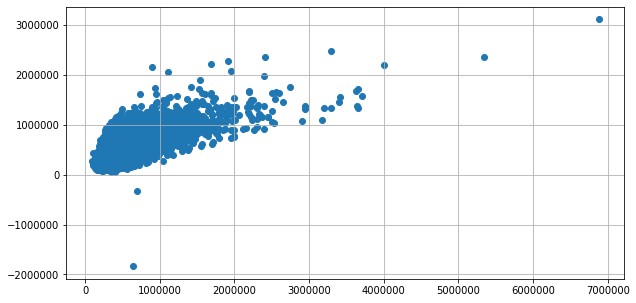

In [65]:
#plot of actual plot vs prediciton
plt.figure(figsize = (10,5))
plt.grid(axis='both')
plt.scatter(y_test, prediction)

# if the plot is showing a liner relationship then the model is good

In [60]:
#we use the following number of coefficients
X.shape

#lets evaluate the coeff we used ( 10 features)
# we did model = LinearRegression() previously
model.coef_    # bedroom, bathroom etc

array([-7.71942673e+04,  8.47029083e+04,  3.07154639e+02, -3.84198488e-01,
       -3.05786123e+03,  1.35973465e+02])

In [31]:
#now we will map the coefficients with the features in id 6414100192 & we will check the effect
dframe = pd.DataFrame(model.coef_, X.columns, columns = ['Coeff Val'])
dframe

,Coeff Val
bedrooms,-70685.763090
bathrooms,70733.308181
sqft_living,253.682294
sqft_lot,-0.313117
floors,66795.420732
sqft_above,-7.311821
sqft_living15,98.518652
yr_built,-3403.071603
condition,20728.218557
zipcode,233.594494


In [32]:
#consider above, consider sqft_living - it tells, 1 unit increase in sqft_living increases the 253$ in price 
# but increase in bedroom decreases the price (check siclearn documents)

#now lets check where our linear regression line intercepts the y axis
model.intercept_ 

-16451025.434621625

# 3. Root Mean Square Error (RMSE)

In [2]:
# RMS Deviation = (mean-prediciton)^2
# we have to minimize the RMS Error

from sklearn import metrics

In [34]:
mean_error = metrics.mean_squared_error(y_test, prediction)
mean_sq_error = np.sqrt(mean_error) # RMSE
mean_sq_error #RMSE of all the 10 coefficients

244562.26009625127

# Another model with fewer features


In [35]:
# steps to do
# 1. take X (to be predicted=matrix) and y(what is to predict =array)
# 2. convert X & y into TEST & TRAINING data (30%, 70%)
# 3. create the model => LinearRegression(), fit the model with training data
# 4. predict the X_test (model.predict)
# 5. Evaluate your model  (Scatter plot- should be linear)
# 6. Calculate RMSE

In [36]:
#Removing few features from X
X = house[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'yr_built', 'zipcode']]
y = house['price'] # target is

#now repeat same, TRANING & TESTING data sets

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 7) 

In [38]:
model2 = LinearRegression()

In [39]:
model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
model2.coef_

array([-7.71942673e+04,  8.47029083e+04,  3.07154639e+02, -3.84198488e-01,
       -3.05786123e+03,  1.35973465e+02])

In [41]:
dframe2 = pd.DataFrame(model2.coef_, X.columns, columns=['Coeff Value'])
dframe2

,Coeff Value
bedrooms,-77194.267256
bathrooms,84702.908303
sqft_living,307.154639
sqft_lot,-0.384198
yr_built,-3057.861235
zipcode,135.973465


In [42]:
prediction2 = model2.predict(X_test)           # predict using samples
prediction2

array([134839.28272603, 718281.20796019, 740215.29019638, ...,
       331717.83006122, 426839.5755428 , 423192.85681408])

In [43]:
print(prediction[1])          # from model 1
prediction2[1]                # from model 2

771726.4559570253


718281.207960194

In [44]:
house1['price']

1    538000
Name: price, dtype: int64

In [45]:
mean_error2 = metrics.mean_squared_error(y_test, prediction2)
mean_sq_error2 = np.sqrt(mean_error2)
print(mean_sq_error2)
mean_sq_error

248257.0852332318


244562.26009625127

In [46]:
#from above, mean_sq_error2 and mean_sq_error we can say that
# "model1" performance better than "model2" as (mean_sq_error2 > mean_sq_error) and RMSE must be minimum

In [47]:
# REASONS - 1. model 1 = 10 features, model2 had 6 features. (more features more good model)

#           BUT BUT

# Model 2  house price predicts price better Model 1
# But on AVERAGE, MODEL1 is better than MODEL2

# Model 3 --> consider 16 features